<a href="https://colab.research.google.com/github/M-H-Amini/NerualNetworks-TA-2021/blob/main/NNTA_Lecture2_NormalEqnKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Neural Networks TA
# Lecture 2 - Normal Equation + Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  Dataset Generation

In [15]:
no_of_samples = 15
W, b = 2.1, 4.8

X = np.linspace(0, 20, no_of_samples)[:, np.newaxis]
y = W * X + b + 8 * np.random.rand(no_of_samples, 1)

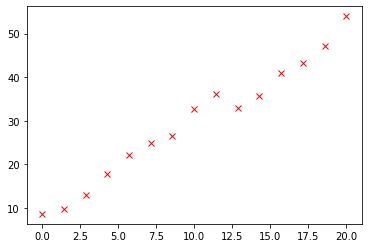

In [16]:
plt.figure()
plt.plot(X, y, 'rx')
plt.show()

#  Normal Equation
$\underline{w} = (X^TX)^{-1}X^T\underline{y}$

In [20]:
X = np.linspace(0, 20, no_of_samples)[:, np.newaxis]
y = W * X + b + 8 * np.random.rand(no_of_samples, 1)

##  Adding a column for the bias...
X = np.concatenate((np.ones((no_of_samples, 1)), X), axis=1)

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

Input: 0.00	Target: 9.70	Output: 8.11
Input: 1.43	Target: 10.31	Output: 11.27
Input: 2.86	Target: 15.73	Output: 14.42
Input: 4.29	Target: 13.88	Output: 17.57
Input: 5.71	Target: 17.10	Output: 20.73
Input: 7.14	Target: 25.93	Output: 23.88
Input: 8.57	Target: 28.86	Output: 27.04
Input: 10.00	Target: 32.24	Output: 30.19
Input: 11.43	Target: 35.78	Output: 33.34
Input: 12.86	Target: 35.75	Output: 36.50
Input: 14.29	Target: 42.72	Output: 39.65
Input: 15.71	Target: 38.74	Output: 42.81
Input: 17.14	Target: 41.52	Output: 45.96
Input: 18.57	Target: 51.03	Output: 49.11
Input: 20.00	Target: 53.54	Output: 52.27


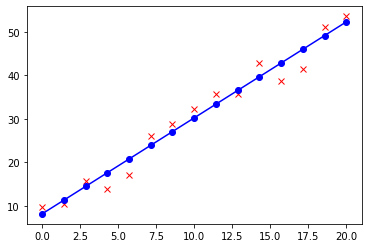

In [24]:
outputs = X.dot(w)

for i in range(no_of_samples):
  print(f'Input: {X[i,1]:4.2f}\tTarget: {y[i,0]:4.2f}\tOutput: {outputs[i,0]:4.2f}')

plt.figure()
plt.plot(X[:, 1], y, 'rx', X[:, 1], outputs, 'b-o')
plt.show()

In [25]:
print(w)

[[8.11256367]
 [2.20770475]]


#  Keras

In [35]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [28]:
X = np.linspace(0, 20, no_of_samples)[:, np.newaxis]
y = W * X + b + 8 * np.random.rand(no_of_samples, 1)

#  Neural Network

In [38]:
model = Sequential()
model.add(Dense(1, 'linear', input_shape=(1,)))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.compile(optimizer=SGD(0.001), loss='mse')

In [42]:
model.fit(X, y, batch_size=5, epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 17.3994
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 17.5889
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 17.3481
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 17.4528
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 17.2065
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 17.2156
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 17.2116
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 17.1730
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 17.2241
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 17.0716
Epoch 11/20
3/3 [==============================] - 0s 2ms/step - loss: 17.8226
Epoch 12/20
3/3 [==============================] - 0s 3ms/step - loss: 16.9193
Epoch 13/20
3/3 [==============================] - 0s 2ms/ste

Input: 0.00	Target: 7.40	Output: 0.82
Input: 1.43	Target: 10.29	Output: 4.69
Input: 2.86	Target: 16.24	Output: 8.57
Input: 4.29	Target: 15.64	Output: 12.45
Input: 5.71	Target: 24.44	Output: 16.32
Input: 7.14	Target: 19.87	Output: 20.20
Input: 8.57	Target: 25.75	Output: 24.07
Input: 10.00	Target: 26.76	Output: 27.95
Input: 11.43	Target: 34.87	Output: 31.83
Input: 12.86	Target: 35.24	Output: 35.70
Input: 14.29	Target: 38.51	Output: 39.58
Input: 15.71	Target: 40.42	Output: 43.46
Input: 17.14	Target: 48.73	Output: 47.33
Input: 18.57	Target: 49.00	Output: 51.21
Input: 20.00	Target: 52.41	Output: 55.08


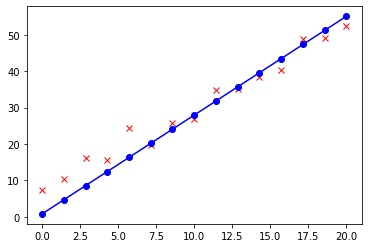

In [46]:
outputs = model(X)

for i in range(no_of_samples):
  print(f'Input: {X[i,0]:4.2f}\tTarget: {y[i,0]:4.2f}\tOutput: {outputs[i,0]:4.2f}')

plt.figure()
plt.plot(X, y, 'rx', X, outputs, 'b-o')
plt.show()

In [47]:
print(model.trainable_weights)

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.7134466]], dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.8160086], dtype=float32)>]
